In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.kernel_ridge
import sklearn.metrics.pairwise

In [2]:
# Get naive and actual occupancy percentage data
X_data = pd.read_csv('X_data.csv')
X_data = np.array(X_data.values.tolist())
X_data = X_data[:,3]
print('Naive occupancy')
print(X_data[0:10])

Y_data = pd.read_csv('Y_data.csv')
Y_data = np.array(Y_data.values.tolist())
Y_data = Y_data[:,1]
print('Actual occupancy')
print(Y_data[0:10])

Naive occupancy
[0.286 0.286 0.321 0.321 0.321 0.321 0.321 0.357 0.357 0.357]
Actual occupancy
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


In [3]:
# Group data to day snapshot
X_data = np.reshape(X_data, (84,720))
print('Naive occupancy')
print(X_data.shape)
print(X_data[0][:10])


Y_data = np.reshape(Y_data, (84,720))
print('Actual occupancy')
print(Y_data.shape)
print(Y_data[0][:10])

Naive occupancy
(84, 720)
[0.286 0.286 0.321 0.321 0.321 0.321 0.321 0.357 0.357 0.357]
Actual occupancy
(84, 720)
[0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75]


In [15]:
def avg_error(predict, test):
    n = len(predict)
    error = 0
    for i in range(n):
        error += np.mean(np.abs(test-predict))
    return error/n

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.20, random_state=52)

In [87]:
random_list = random.sample(range(0, len(x_test)), 9)

## Polynomial kernel

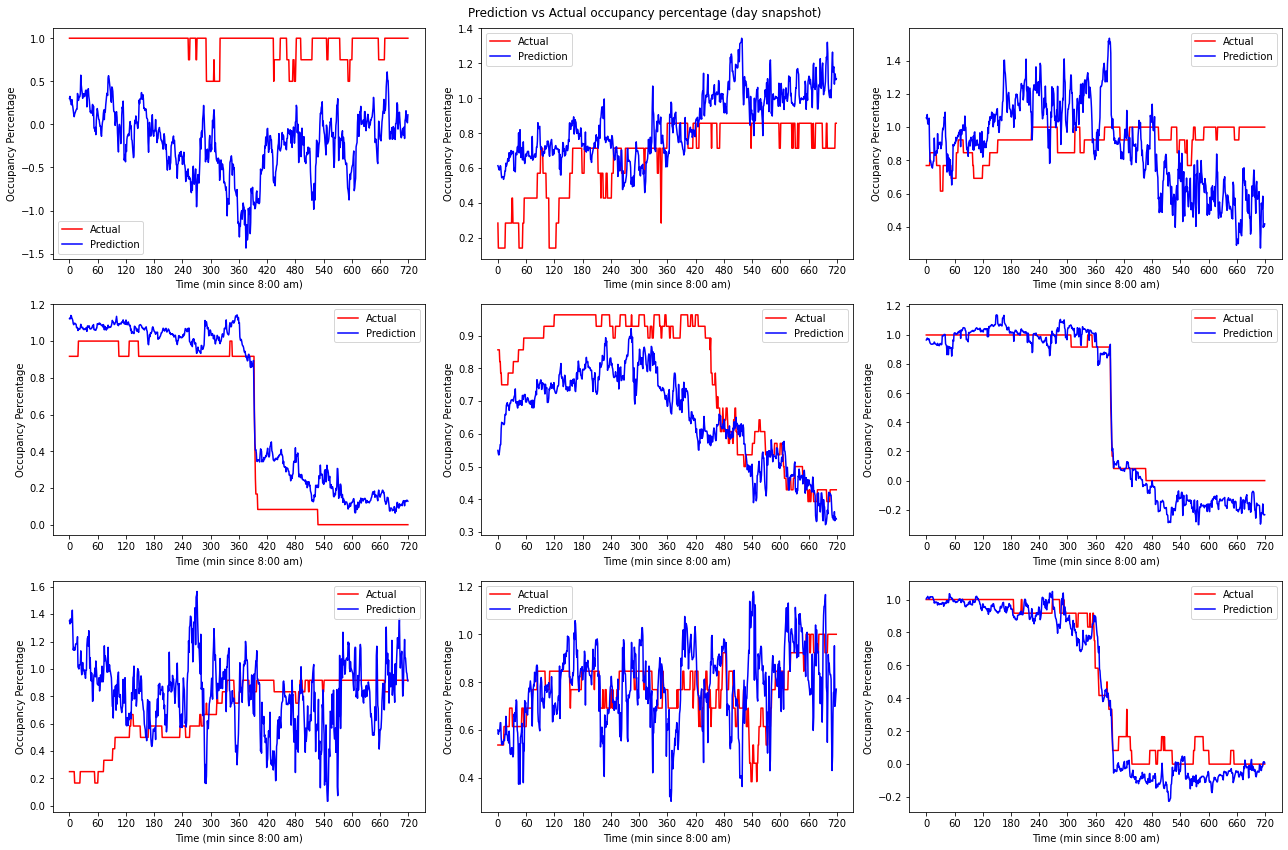

In [96]:
time = np.arange(720)
m = len(x_train)
d = 3
K_train = sklearn.metrics.pairwise.polynomial_kernel(x_train, x_train, degree=d)
K_test  = sklearn.metrics.pairwise.polynomial_kernel(x_test,  x_train, degree=d)

K_train = K_train + 1e-10*np.eye(m)

clf = sklearn.linear_model.LinearRegression()
clf.fit(K_train, y_train)
y_predict = clf.predict(K_test)

time = np.arange(720)

plt.figure(figsize=(18,12))
plt.suptitle('Prediction vs Actual occupancy percentage (day snapshot)')

for i in range(9):
    index = random_list[i]
    plt.subplot(3, 3, i+1)
    plt.plot(time, y_test[index], color='r', label='Actual')
    plt.plot(time, y_predict[index], color='b', label='Prediction')
    plt.legend()
    plt.xlabel('Time (min since 8:00 am)')
    plt.xticks(np.arange(0,780,60))
    plt.ylabel('Occupancy Percentage')

plt.tight_layout()
plt.show()

In [97]:
error_naive = avg_error(x_test, y_test)
error_model = avg_error(y_predict, y_test)
print(error_naive)
print(error_model)

0.26496315359477135
0.2208668425160033


## Ridge Regression with Gaussian kernel

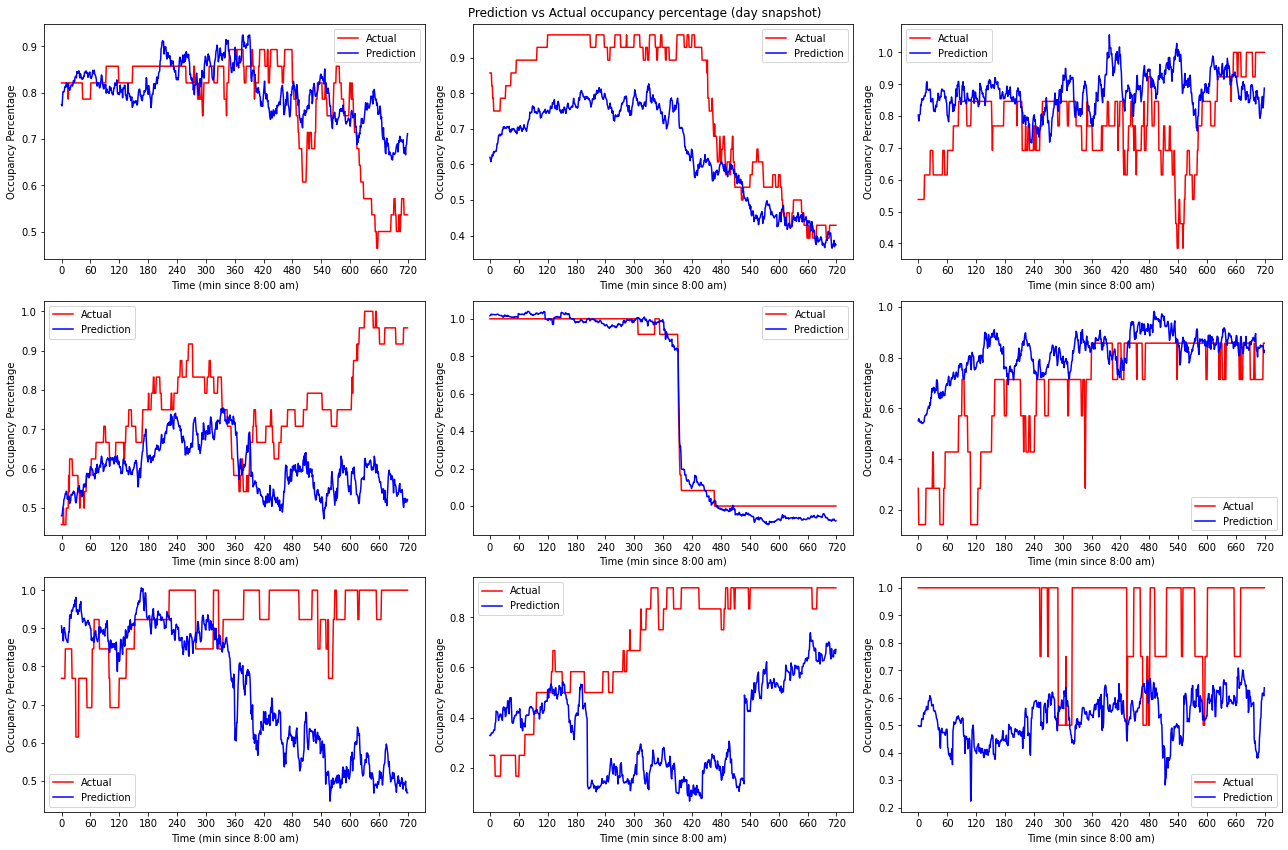

In [82]:
from sklearn import kernel_ridge

lambda_val = 0.01
gamma = 0.005

clf = kernel_ridge.KernelRidge(alpha=lambda_val, kernel='rbf', gamma=gamma)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

plt.figure(figsize=(18,12))
plt.suptitle('Prediction vs Actual occupancy percentage (day snapshot)')

for i in range(9):
    index = random_list[i]
    plt.subplot(3, 3, i+1)
    plt.plot(time, y_test[index], color='r', label='Actual')
    plt.plot(time, y_predict[index], color='b', label='Prediction')
    plt.legend()
    plt.xlabel('Time (min since 8:00 am)')
    plt.xticks(np.arange(0,780,60))
    plt.ylabel('Occupancy Percentage')

plt.tight_layout()
plt.show()

In [83]:
error_naive = avg_error(x_test, y_test)
error_model = avg_error(y_predict, y_test)
print(error_naive)
print(error_model)

0.26496315359477135
0.1520755878005447
